In [ ]:
from ner_influence.linear_modelling.datamodule import LinearNERDataModule
data = LinearNERDataModule(
    splits={
        "train": "data/conll_corrected/train_corrected.jsonl",
        "validation": "data/conll_corrected/validation_corrected.jsonl",
        "test": "data/conll_corrected/test_corrected.jsonl",
    },
    label_list=None,
    batch_size=64,
)
data.setup()
data._label_list 

In [ ]:
from ner_influence.linear_modelling.scaffolding import LinearNERScaffolding

In [ ]:
scaff = LinearNERScaffolding(data, seed=2022, reg_strength=1.0)
scaff.sample_data(1000, 200)
scaff.print_loss_and_grad()
scaff.train()
scaff.evaluate()

In [ ]:
scaff.hessian()

In [ ]:
scaff.train_predictions = scaff.generate_all_predictions("sampled_train")
scaff.val_predictions = scaff.generate_all_predictions("sampled_validation")

In [ ]:
s = 0.0
for x in scaff.val_predictions:
    s += (x["gold_labels"] != x["predicted_labels"]).sum()
s

In [ ]:
scaff.train_gradients = [scaff.gradient(x) for x in scaff.train_predictions]
scaff.val_gradients = [scaff.gradient(x) for x in scaff.val_predictions]

In [ ]:
import numpy as np
mispredictions = [(i, y) for i, x in enumerate(scaff.val_predictions) for y in np.where(x["gold_labels"] != x["predicted_labels"])[0]]

sampled_mispredictions = [
    mispredictions[i]
    for i in np.random.RandomState(seed=2022).choice(len(mispredictions), size=20, replace=False)
]

In [ ]:
scaff.open_file("outputs/linear_model_exact_influence.tsv")

for val_idx, val_token_idx in sampled_mispredictions:
    influence_instances = scaff.compute_influence(val_idx, val_token_idx)

    for train_idx, train_token_idx in influence_instances:
        values = scaff.retrain(train_idx, train_token_idx, val_idx, val_token_idx)
        scaff.store(values)

scaff.close()

## Generate Data

In [33]:
from ner_influence.linear_modelling.datamodule import SyntheticNERDataModule

data = SyntheticNERDataModule(batch_size=64)
data.setup()

In [34]:
from ner_influence.linear_modelling.scaffolding import LinearNERScaffolding
scaff = LinearNERScaffolding(data, seed=2022, reg_strength=1.0)
# scaff.sample_data(1000, 200)
scaff.print_loss_and_grad()
scaff.train(tol=5e-6)
scaff.evaluate()

Global seed set to 2022


33.334228515625 {'_feature_to_logit.weight': 13.278122901916504, '_crf.transitions': 12.113810539245605}
Iter: 100 -- 8.4326810836792 0.0002838345244526863 0.1
Iter: 200 -- 8.432605743408203 7.551512680947781e-06 0.1
Opt condition reached
Iter: 207 -- 8.432612419128418 4.839705070480704e-06 0.1
8.432612419128418 {'_feature_to_logit.weight': 1.2679606697929557e-05, '_crf.transitions': 7.025433205853915e-06}


TypeError: predict_step() missing 1 required positional argument: 'batch_idx'

In [35]:
scaff.hessian()

100%|██████████| 5/5 [00:08<00:00,  1.78s/it]


In [36]:
scaff.train_predictions = scaff.generate_all_predictions("sampled_train")
scaff.val_predictions = scaff.generate_all_predictions("sampled_validation")

In [37]:
s = 0.0
for x in scaff.val_predictions:
    s += (x["gold_labels"] != x["predicted_labels"]).sum()
s

590.0

In [38]:
scaff.train_gradients = [scaff.gradient(x) for x in scaff.train_predictions]
scaff.val_gradients = [scaff.gradient(x) for x in scaff.val_predictions]

In [39]:
import numpy as np
mispredictions = [(i, y) for i, x in enumerate(scaff.val_predictions) for y in np.where(x["gold_labels"] != x["predicted_labels"])[0]]

sampled_mispredictions = [
    mispredictions[i]
    for i in np.random.RandomState(seed=2022).choice(len(mispredictions), size=20, replace=False)
]

In [40]:
# scaff.open_file("outputs/linear_model_exact_influence.tsv")

for val_idx, val_token_idx in sampled_mispredictions[:1]:
    influence_instances = scaff.compute_influence(val_idx, val_token_idx)

    for train_idx, train_token_idx in influence_instances:
        values = scaff.retrain(train_idx, train_token_idx, val_idx, val_token_idx)
        # scaff.store(values)

# scaff.close()

Global seed set to 2022


defaultdict(<class 'list'>, {775: [20]})
Iter: 100 -- 8.430520057678223 0.00033795321360230446 0.1
Opt condition reached
Iter: 192 -- 8.430436134338379 4.268018528819084e-06 0.1
8.430436134338379 {'_feature_to_logit.weight': 1.0446952728671022e-05, '_crf.transitions': 9.646710168453865e-06}
2.177491 2.1696074183129856 0.007883531317751657 0.007845925976205585


Global seed set to 2022


defaultdict(<class 'list'>, {798: [20]})
Iter: 100 -- 8.430517196655273 0.0004654881195165217 0.1
Opt condition reached
Iter: 181 -- 8.430435180664062 4.451139830052853e-06 0.1
8.430435180664062 {'_feature_to_logit.weight': 1.06197676359443e-05, '_crf.transitions': 1.0525127436267212e-05}
2.1775138 2.1696074183129856 0.007906419501345407 0.007845925976205585


Global seed set to 2022


defaultdict(<class 'list'>, {805: [20]})
Iter: 100 -- 8.430511474609375 0.00025317328982055187 0.1
Opt condition reached
Iter: 186 -- 8.430427551269531 4.852074198424816e-06 0.1
8.430427551269531 {'_feature_to_logit.weight': 9.772111297934316e-06, '_crf.transitions': 7.892769644968212e-06}
2.1775014 2.1696074183129856 0.007894021735232126 0.007845925976205585


Global seed set to 2022


defaultdict(<class 'list'>, {818: [20]})
Iter: 100 -- 8.430510520935059 0.00024652527645230293 0.1
Opt condition reached
Iter: 183 -- 8.43043041229248 4.4298358261585236e-06 0.1
8.43043041229248 {'_feature_to_logit.weight': 9.351280823466368e-06, '_crf.transitions': 9.007889275380876e-06}
2.1775212 2.1696074183129856 0.007913810477297556 0.007845925976205585


Global seed set to 2022


defaultdict(<class 'list'>, {823: [20]})
Iter: 100 -- 8.430535316467285 0.0003037473652511835 0.1
Opt condition reached
Iter: 193 -- 8.43043327331543 4.109577275812626e-06 0.1
8.43043327331543 {'_feature_to_logit.weight': 1.3912111171521246e-05, '_crf.transitions': 8.588572200096678e-06}
2.1775088 2.1696074183129856 0.007901412711184275 0.007845925976205585


Global seed set to 2022


defaultdict(<class 'list'>, {838: [20]})
Iter: 100 -- 8.43052864074707 0.0002653405535966158 0.1
Opt condition reached
Iter: 177 -- 8.430424690246582 4.165177870163461e-06 0.1
8.430424690246582 {'_feature_to_logit.weight': 1.0180246135860216e-05, '_crf.transitions': 9.038907592184842e-06}
2.177532 2.1696074183129856 0.007924539313357126 0.007845925976205585


Global seed set to 2022


defaultdict(<class 'list'>, {850: [20]})
Iter: 100 -- 8.430527687072754 0.00048402673564851284 0.1
Opt condition reached
Iter: 187 -- 8.430436134338379 4.059984348714352e-06 0.1
8.430436134338379 {'_feature_to_logit.weight': 1.070013331627706e-05, '_crf.transitions': 9.16421504371101e-06}
2.1775181 2.1696074183129856 0.007910711035769236 0.007845925976205585


Global seed set to 2022


defaultdict(<class 'list'>, {925: [20]})
Iter: 100 -- 8.430527687072754 0.0002749671693891287 0.1
Iter: 200 -- 8.430438041687012 1.4857621863484383e-05 0.1
Opt condition reached
Iter: 236 -- 8.430432319641113 4.6335626393556595e-06 0.1
8.430432319641113 {'_feature_to_logit.weight': 1.0435139301989693e-05, '_crf.transitions': 8.504523975716438e-06}
2.177501 2.1696074183129856 0.007893544898073923 0.007845925976205585


Global seed set to 2022


defaultdict(<class 'list'>, {985: [20]})
Iter: 100 -- 8.430503845214844 0.00029529561288654804 0.1
Opt condition reached
Iter: 197 -- 8.430428504943848 4.590488970279694e-06 0.1
8.430428504943848 {'_feature_to_logit.weight': 8.868741133483127e-06, '_crf.transitions': 1.0738005585153587e-05}
2.1775079 2.1696074183129856 0.007900459036867868 0.007845925976205585


Global seed set to 2022


defaultdict(<class 'list'>, {987: [20]})
Iter: 100 -- 8.430516242980957 0.0003697869833558798 0.1
Opt condition reached
Iter: 180 -- 8.43043327331543 4.536312189884484e-06 0.1
8.43043327331543 {'_feature_to_logit.weight': 1.33069124785834e-05, '_crf.transitions': 1.1327833817631472e-05}
2.1775217 2.1696074183129856 0.007914287314455759 0.007845925976205585


## Results

In [4]:
import pandas as pd 
import numpy as np
df = pd.read_csv("outputs/linear_model_exact_influence.tsv", sep="\t", header=None)

In [5]:
df = df[df[6] < 1.0]

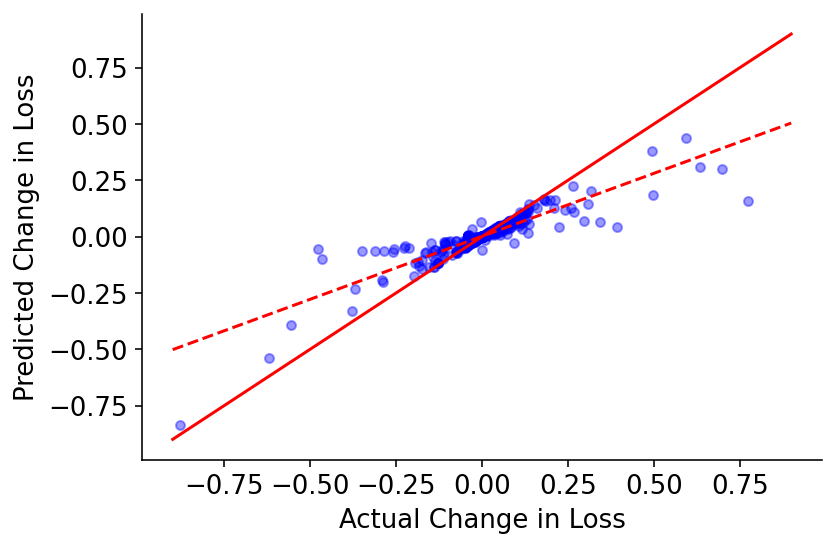

In [6]:
import matplotlib.pyplot as plt 
%config InlineBackend.figure_format = 'retina'
import matplotlib
matplotlib.rcParams['axes.spines.right'] = False
matplotlib.rcParams['axes.spines.top'] = False
matplotlib.rcParams.update({'font.size': 13})

b, a = np.polyfit(df[6], df[7], deg=1)
xseq = np.linspace(-0.9, 0.9, 1000)
yseq = a + b*xseq

plt.plot([-0.9, 0.9], [-0.9, 0.9], c="r")
plt.plot(xseq, yseq, c="r", linestyle="--")
plt.scatter(df[6], df[7], s=20, alpha=0.4, c="b")

plt.xlabel("Actual Change in Loss")
plt.ylabel("Predicted Change in Loss")
plt.tight_layout()
plt.savefig("linear_model_exact_influence.pdf")

In [7]:
b, a = np.polyfit(df[6], df[7], deg=1)

In [8]:
b, a

(0.5590649904564458, 0.0014695290146000642)

In [9]:
xseq = np.linspace(-0.8, 0.75, 1000)
yseq = a + b*xseq

In [10]:
np.corrcoef(df[6], df[7])

array([[1.       , 0.8884399],
       [0.8884399, 1.       ]])